#### 1) Dataset lab04_dataset_1.csv have two variables x1 and x2. Apply KMeans algorithm on the two-dimensional data and output the resultng clusters using a scatterplot. You will apply KMeans over several clusters ranging from cluster-count K = 2 to 6. Make sure for every iteraton of different cluster-count, your scatterplot should use K colors to clearly distnguish the data points belonging in their respectve K clusters. Also, compute the SilhoueGe score for each of those K clusters and plot that score against K.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [63]:
data = pd.read_csv("lab04_dataset_1.csv")
data.head()

,x1,x2
0,1.102564,1.916789
1,1.142634,1.838410
2,1.294959,1.852666
3,1.431706,1.859261
4,1.461399,1.775216


In [64]:
def builtScatterPlot(minValue, maxValue, data) :

    silhouetteScoreDict = {}

    for i in range(minValue, (maxValue + 1)):
        kmeans = KMeans(n_clusters=i, random_state=50)
        kmeans.fit(data)
        labels = kmeans.predict(data)
        
        score = silhouette_score(data, kmeans.labels_)
        silhouetteScoreDict[i] = score

        plt.figure(figsize=(10,5))
        plt.subplot(1, len(range(5, 7)), 1)
        plt.scatter(data['x1'], data['x2'], c=kmeans.labels_, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c='red', s=200)
        plt.title("k = {}, silhouette Score : {:.2f}". format(i, score))

    return silhouetteScoreDict


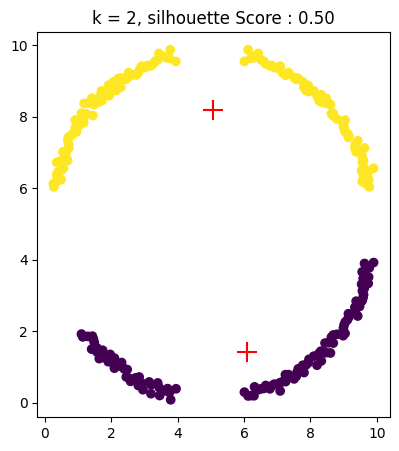

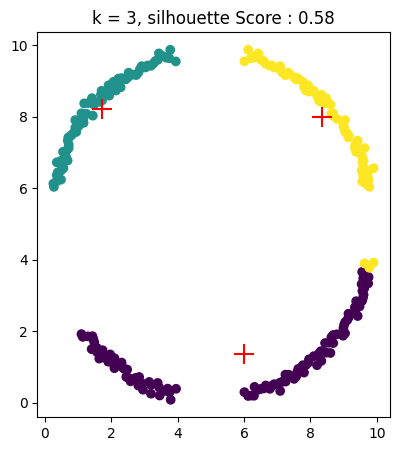

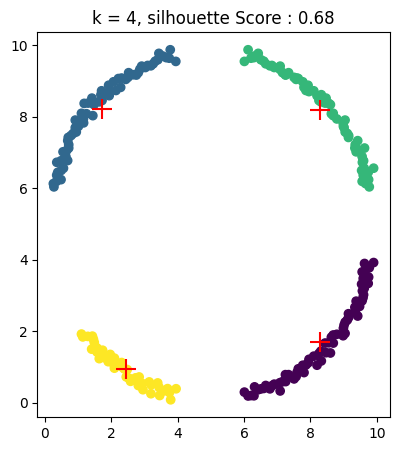

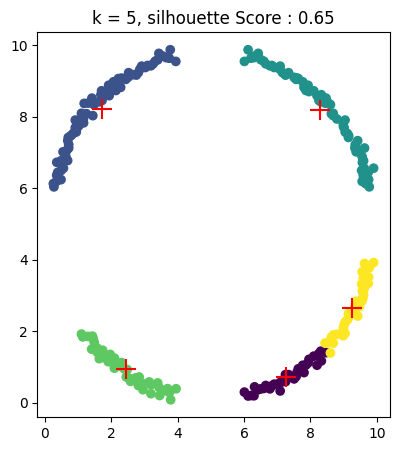

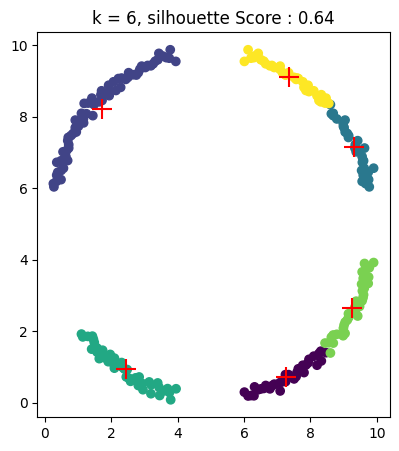

In [65]:
silhouetteScoreDict = builtScatterPlot(2, 6, data)

In [66]:
silhouetteScoreDict

{2: 0.49721305003469096,
 3: 0.5781924238958424,
 4: 0.6778975743295701,
 5: 0.6522565287710431,
 6: 0.6394875081002692}

In [67]:
def graphForSilhouetteScore(minValue, maxValue, silhouetteScoreDict):
    plt.figure(figsize=(10,5))
    plt.plot(silhouetteScoreDict.keys(), silhouetteScoreDict.values(), marker='o')
    plt.title("No of clusters k-value vs the respective silhouette Score")
    plt.xlabel('No of clusters k-value')
    plt.ylabel('The value of silhouette score')
    plt.xticks(range(minValue, (maxValue + 1)))
    plt.grid(True)

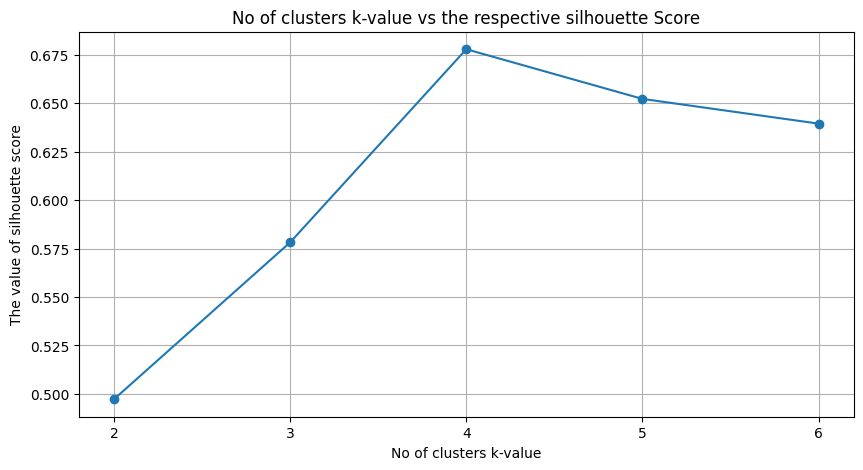

In [68]:
graphForSilhouetteScore(2, 6, silhouetteScoreDict)

#### 2) Dataset lab04_dataset_2.csv have two variables x1 and x2. Again, apply KMeans algorithm on the two-dimensional data with clusters ranging from K = 2 to 4 and output the resulting clusters using scatterplots. Do the cluster outputs you obtained using KMeans for this dataset make sense?

In [69]:
data1 = pd.read_csv('lab04_dataset_2.csv')
data1.head()

,ring,x1,x2
0,1,2.106861,-0.147326
1,2,3.408242,-0.238327
2,3,6.499233,-0.454471
3,4,9.701769,-0.678414
4,1,2.120919,-0.111153


{2: 0.2762083879143382, 3: 0.2899506638431938, 4: 0.30088171899686994}

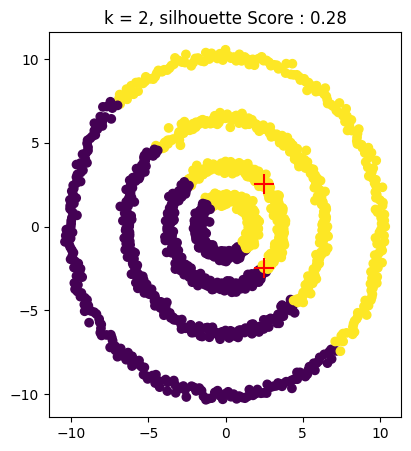

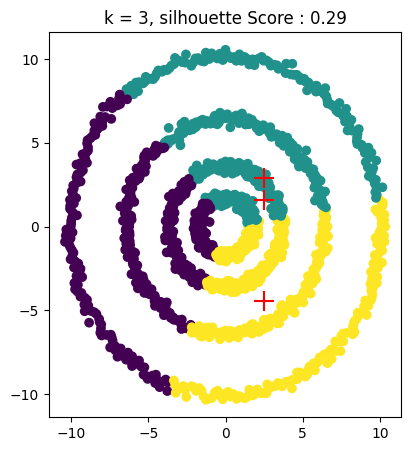

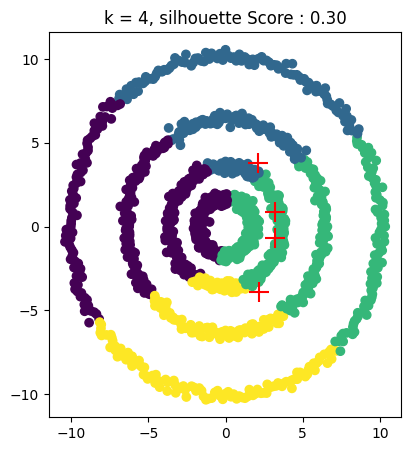

In [70]:
silhouetteScoreDict1 = builtScatterPlot(2, 4, data1)
silhouetteScoreDict1

{2: 0.2762083879143382, 3: 0.2899506638431938, 4: 0.30088171899686994}

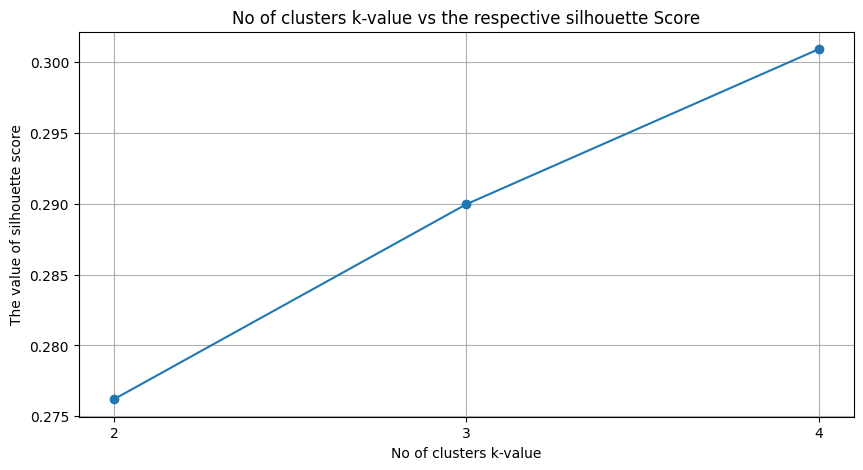

In [71]:
graphForSilhouetteScore(2, 4, silhouetteScoreDict1)
silhouetteScoreDict1

In [72]:
#### Solutiion : 



#### 3) The data in the lab04_dataset_2.csv forms 4 concentric rings rather than being well- separated clusters. So ideally, we would want 4 clusters representing the 4 concentric rings. KMeans is not well-suited to handle data like this. Use SpectralClustering to cluster the data. Show the results for clusters K = 2 to 4

In [73]:
data1 = pd.read_csv('lab04_dataset_2.csv')
data1.head()
minCluster = 2
maxCluster = 4

In [88]:
def buildSpectralClustering(minValue, maxValue, df):

    silhouetteScoreDict = {}

    plt.figure(figsize=(18, 5))
    
    for i in range(minValue, (maxValue + 1)):
        spectralClusturing = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=50)
        y_pred = spectralClusturing.fit_predict(df)
        print(y_pred)

        plt.subplot(1, 5, i+1)
        plt.scatter(x=df['x1'], y=df['x2'], c=y_pred, cmap='viridis') 
        plt.title(f'Spectral Clustering when k = {i}')
        plt.legend()

        silhouetteScoreDict[i] = silhouette_score(df[['x1', 'x2']], y_pred)

    return silhouetteScoreDict

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 0 0 ... 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 0 2 ... 0 2 0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 2 3 ... 2 3 0]


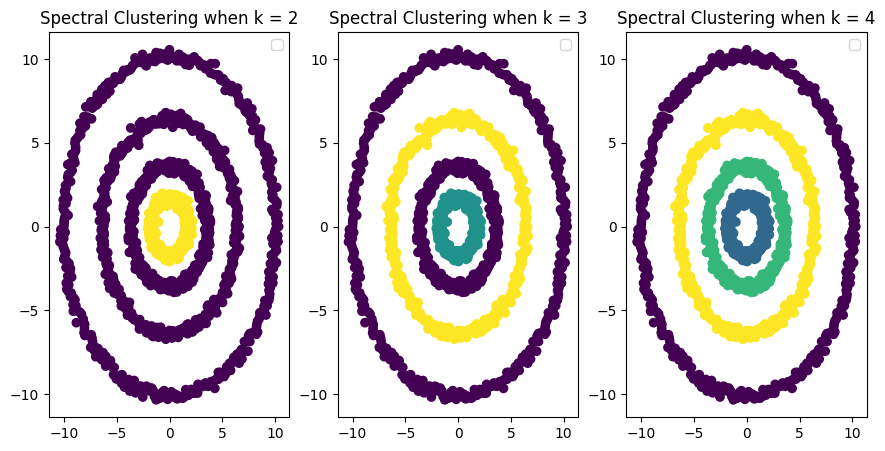

In [89]:
silhouetteScoreDict = buildSpectralClustering(minCluster, maxCluster, data1)

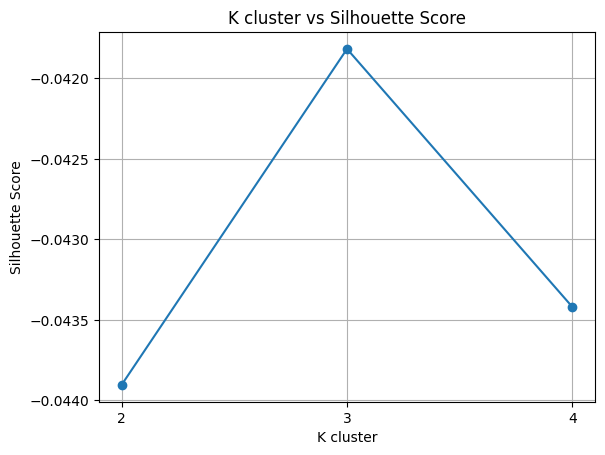

In [91]:
plt.tight_layout()
plt.plot(silhouetteScoreDict.keys(), silhouetteScoreDict.values(), marker='o')
plt.title("K cluster vs Silhouette Score")
plt.xlabel("K cluster")
plt.ylabel("Silhouette Score")
plt.xticks(range(minCluster, (maxCluster + 1)))
plt.grid(True)

#### 4) It is possible that SpectralClustering although an improvement over K-Means is still not able to create 4 clusters corresponding to the 4 concentric rings. Explore the other sklearn clustering algorithms to see which one can produce 4 clusters corresponding with the 4 concentric rings. Hint: I mentioned this algorithm during our class while discussing density-based clustering.

In [92]:
data2 = pd.read_csv('lab04_dataset_2.csv')
data2.head()
minCluster = 2
maxCluster = 4

In [105]:
def buildDBSCAN(minCluster, maxCluster, df):

    for i in range(minCluster, (maxCluster + 1)):
        dbScan = DBSCAN(eps=0.5, min_samples=i)
        labels = dbScan.fit_predict(data2)

        plt.figure(figsize=(4, 4))
        plt.scatter(df['x1'], df['x2'], c = labels, cmap='viridis')
        plt.title(f"Clustering using DBSCAN with min_samples = {i}")
        plt.xlabel("values of x1")
        plt.ylabel("values of x2")

        print(labels)
    pass

[0 1 2 ... 1 2 3]
[0 1 2 ... 1 2 3]
[0 1 2 ... 1 2 3]


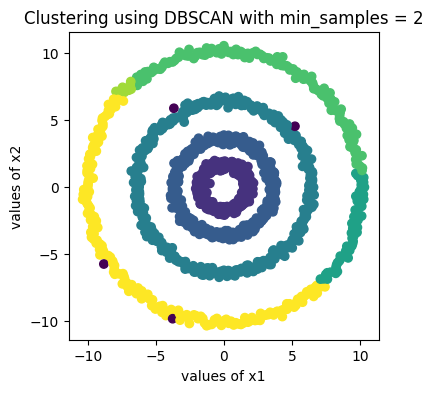

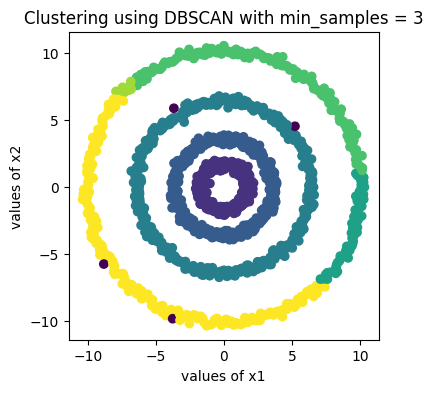

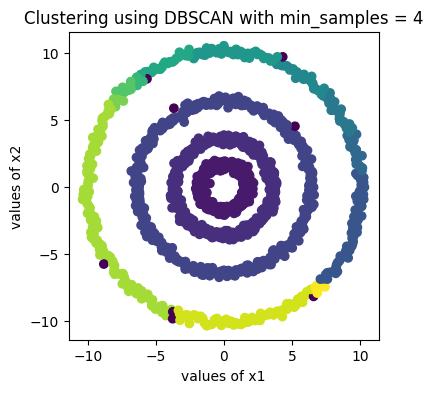

In [106]:
buildDBSCAN(minCluster, maxCluster, data2)